#### **Malaysia's Car Registration Transaction**

**Project Overview**

**Objective :** \
Analyze car registration trends in Malaysia across various dimensions like registration date, state, vehicle type, and brand.

**Dataset Source :** \
*data.gov.my*

**Goal :** \
Provide actionable insights into market trends, identifying factors influencing car registrations over time

##### Import Libraries

In [1]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.5,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##### Data Collection

Loading Dataset

The datasets is stored in a parquet file. \
It contains details on registration date, state, vehicle type, brand, model and color values.

Since the dataset in stored by year individually, we need to fetch it one by one

In [14]:
# Fetching datasets from official website

'https://storage.data.gov.my/transportation/cars_2000.parquet'

'https://storage.data.gov.my/transportation/cars_2000.parquet'

In [15]:
# Fetch and combine into single datasets
dfs = []
for i in range(25):
  url = f'https://storage.data.gov.my/transportation/cars_20{i:02}.parquet'
  df_single = pd.read_parquet(url)
  dfs.append(df_single)

df = pd.concat(dfs, ignore_index=True)

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [ ]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

date_reg    0
type        0
maker       0
model       0
colour      0
fuel        0
state       0
dtype: int64

In [18]:
"""
Convert Data Types
"""
#Convert to datetime
df['date_reg'] = pd.to_datetime(df['date_reg']) #dt.strftime('%Y-%m-%d')

In [19]:
"""
Assign/Create new column
"""
# Assign specific column for 'maker' and 'model'
df['maker_model'] = df['maker'] + ' ' + df['model']

# Assign month and year column for
df['year_reg'] = df['date_reg'].dt.strftime('%Y')
df['month_reg'] = df['date_reg'].dt.strftime('%Y-%m')

In [77]:
df['date_reg'] = pd.to_datetime(df['date_reg']).dt.strftime('%Y-%m-%d')

In [78]:
brand = \
['Perodua','Proton','Toyota','Honda','Nissan',
'Mitsubishi','Mercedes Benz','Mazda','BMW','Ford',
'Isuzu','BYD','Chery','Hyundai','Volvo''Tesla']

In [80]:
year = \
['2019','2020','2021',
'2022','2023','2024']
# '2010','2011','2012','2013', '2014',
# '2015','2016','2017','2018'

df_filter = df[(df['year_reg'].isin(year))&(df['maker'].isin(brand))]
# df_filter.groupby('maker')['maker'].value_counts().sort_values(ascending=False)
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3978735 entries, 10385753 to 14514423
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   date_reg     object
 1   type         object
 2   maker        object
 3   model        object
 4   colour       object
 5   fuel         object
 6   state        object
 7   maker_model  object
 8   year_reg     object
 9   month_reg    object
dtypes: object(10)
memory usage: 333.9+ MB


In [81]:
# df_filter.to_clipboard(index=False)

df_filter_01 = df_filter [:1000000]
df_filter_02 = df_filter [1000001:2000000]
df_filter_03 = df_filter [2000001:3000000]
df_filter_04= df_filter [3000001:4000000]
df_filter_05 = df_filter [4000001:5000000]
df_filter_06 = df_filter [5000001:6000000]
df_filter_07 = df_filter [6000001:7000000]


In [73]:
df_filter_01.to_excel(r'D:\Folders-VS Code\VS Code Folders\11-Portfolio Project\01-project_csvfiles\x-03-car_register.xlsx',index=False)

##### Exploratory Data Analysis

In [ ]:
# Overview dataset
df.head()

Registration Trends : \
Study trends over time to see growth patterns.
Trends are include by monthly and by annually

By refers to line chart below, we see the trend of car registration are moving uptrend.
Indicating positivity of acquiring a car.

2021 to 2022 shows drastically positive peak of car registration. This might be due to post Covid-19 outbreak

In [ ]:
# Total Registration by Year

yearly_trend = df.groupby('year_reg').size()
yearly_trend.plot(kind='line', marker='o')
plt.title('Vehicle Registration over time (Year)')
plt.xlabel('Year')
plt.ylabel('Total Registration')
plt.grid(axis='both')
plt.show()

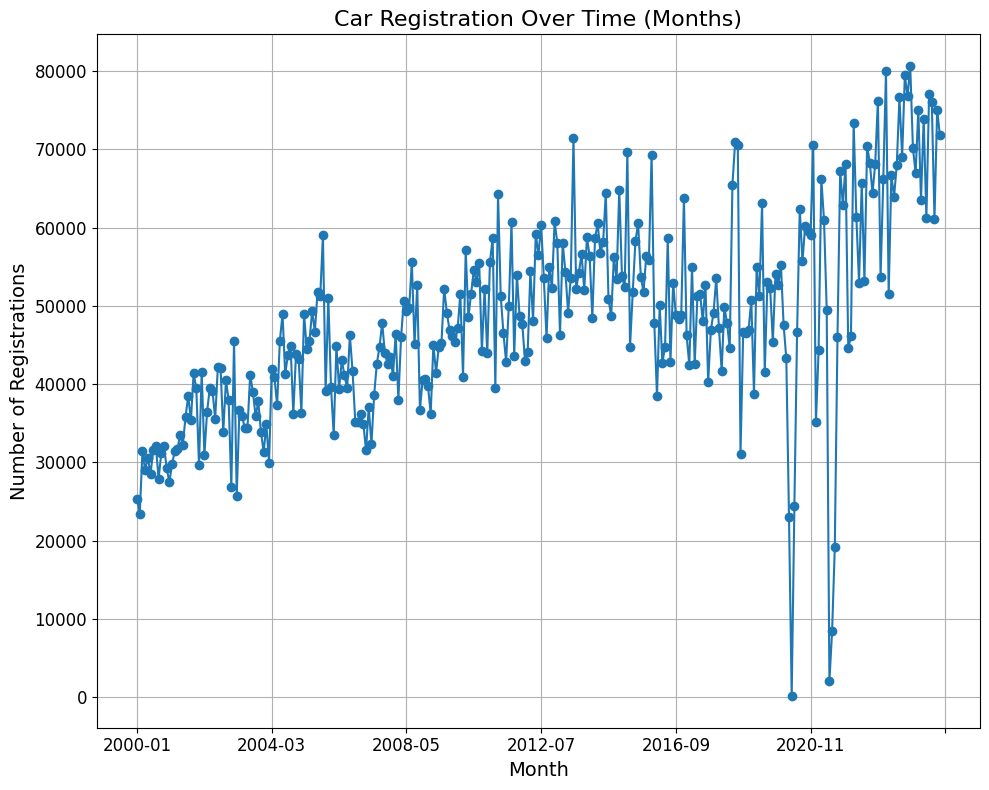

In [ ]:
# Total Registration by Month

monthly_trend = df.groupby('month_reg').size()
monthly_trend.plot(kind='line', marker='o')
plt.title('Vehicle Registration over time (Months)')
plt.ylabel('Total Registrations')
plt.xlabel('Month')
plt.grid(axis='both')
plt.tight_layout()
plt.show()

Vehicle Preferences : \
Analyze the popularity of car brands, models, and fuel types.

Most Malaysian will surely show more of their interest to local brand of vehicle. 
This might be due to its affordability and easily acquired

*Perodua* and *Proton* are 2 local brand that dominate in today's vehicle market

While *Toyota* and *Honda* are 2 import brand that dominate in today's vehicle market

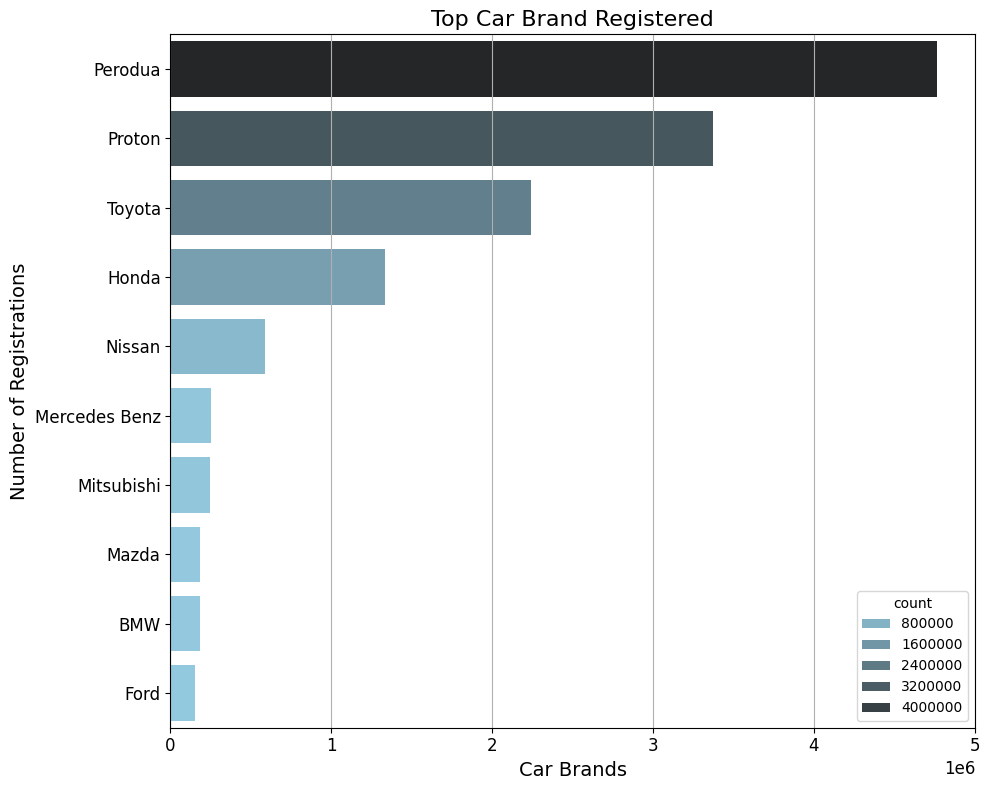

In [ ]:
# Total Registration by Vehicle Brands

top_brands = df['maker'].value_counts().reset_index().head(10)
sns.barplot(data=top_brands, x='count', y='maker',
            color='skyblue_r', orient='h', hue='count')
plt.title('Vehicle Registration by Brands')
plt.ylabel('Total Registrations')
plt.xlabel('Brands')
plt.grid(axis='x')
plt.show()

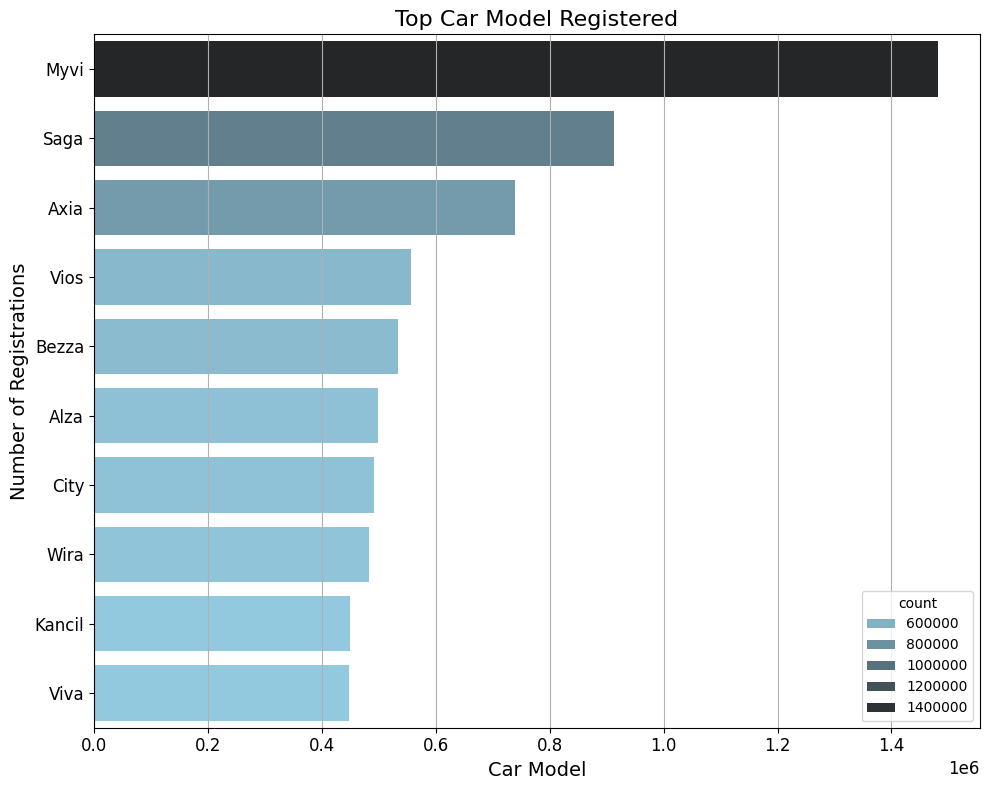

In [ ]:
# Total Registration by Vehicle Models

top_model = df['model'].value_counts().reset_index().head(10)
sns.barplot(data=top_model, x='count', y='model',
            color='skyblue_r', orient='h', hue='count')
plt.title('Vehicle Registration by Models')
plt.ylabel('Total Registrations')
plt.xlabel('Models')
plt.grid(axis='x')
plt.show()

Investigate what kind of fuel type widely used in Malaysia

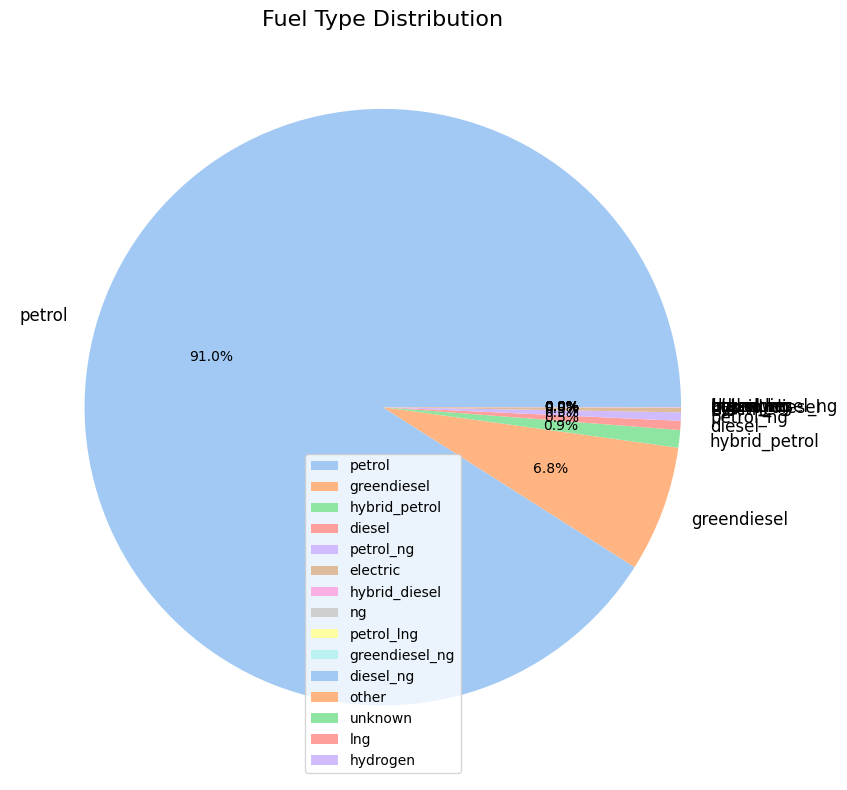

In [ ]:
# Fuel type distribution

fuel_type = df['fuel'].value_counts()
fuel_type.plot(kind='pie', startangle=0, autopct='%1.1f%%',
          title='Fuel Type Distribution',
          colors=sns.color_palette('pastel'))
plt.show()

Investigate what kind of vehicle type widely used in Malaysia

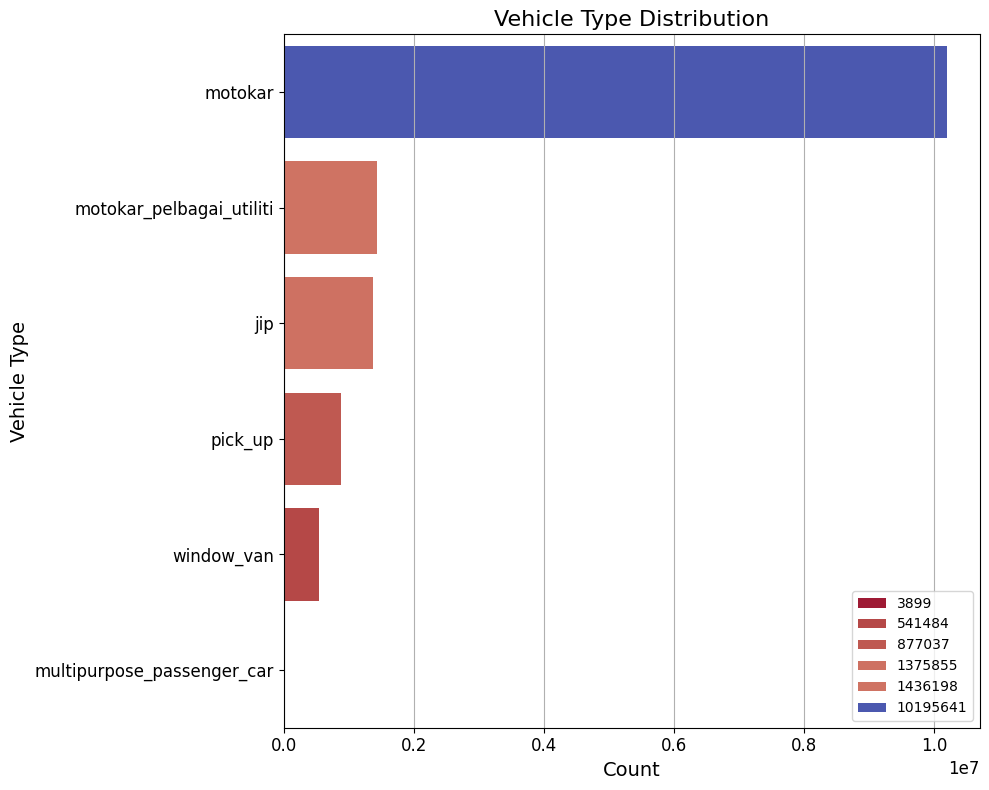

In [ ]:
# Vehicle type distribution

vehicle_type = df['type'].value_counts()
sns.barplot(x=vehicle_type.values,
            y=vehicle_type.index,
            hue=vehicle_type.values, palette='coolwarm_r')
plt.title('Vehicle Type Distribution')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.grid(axis='x')
plt.show()

Regional Insights : \
Investigate state-wise variations in registrations.

*Rakan Niaga* is leading followed by *Kuala Lumpur*, *Johor*, *Pulau Pinang* and *Selangor*

In [ ]:
# Total Registration by States

state_trend = df['state'].value_counts().reset_index()
# state_trend.plot(kind='bar', color='orange',
#                  title='State-wise Vehicle Registrations')
sns.barplot(data=state_trend, x='count',  y='state',
            orient='h', palette='coolwarm_r', hue='count')
plt.title('Vehicle Registration by States')
plt.xlabel('States')
plt.ylabel('Total of Registrations')
plt.grid(axis='both')
plt.show()

##### Advanced Analysis

Showcase the car registration trend in interactive plot type

In [ ]:
# Interactive line chart for yearly trends
fig = px.line(yearly_trend,
              title='Interactive Yearly Vehicle Registrations')
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Total Registrations')

fig.show()

Investigate which model are dominate from each vehicle brand.

Lets take top 5 model from top 5 vehicle brand

In [233]:
# Extract top 5 vehicle brand
top_5_brands = top_brands['maker'].tolist() [:5]

# Group according vehicle brand and model
top_brand_model = df.groupby(['maker','model']).size().sort_values(ascending=False)
top_brand_model = top_brand_model.reset_index().rename(columns={0:'counts'})

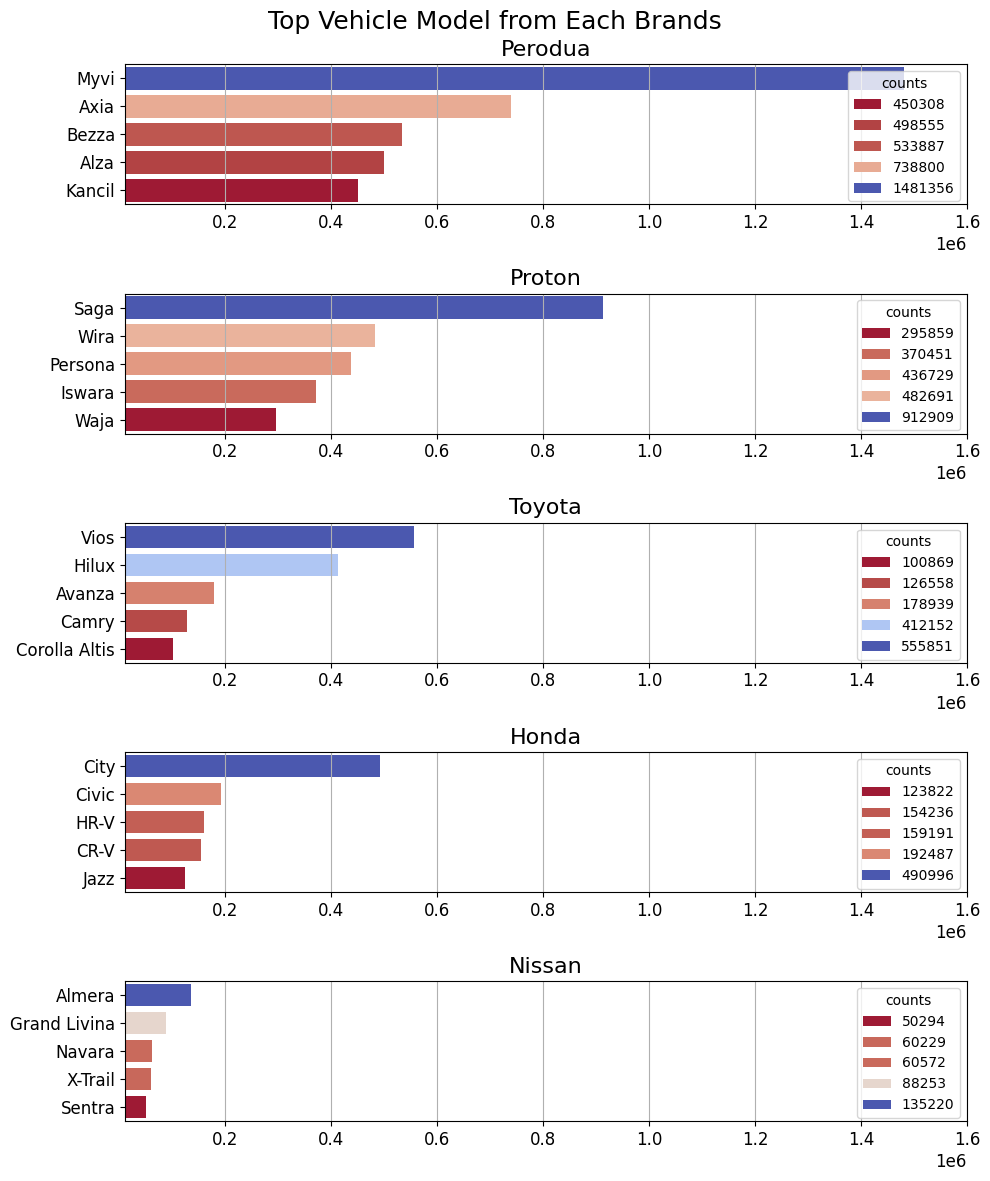

In [378]:
# Plot grouped item in subplots
fig, ax = plt.subplots(len(top_5_brands),1, figsize=(10,12)) # set subplot with height, columns and plot size
for i, brand in enumerate(top_5_brands):
  top_brand_model_5 = top_brand_model[top_brand_model['maker']==brand].sort_values(by='counts',ascending=False) [:5]
  sns.barplot(data=top_brand_model_5, x='counts' ,y='model',
              ax=ax[i], hue='counts', palette='coolwarm_r')
  ax[i].set_title(brand)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].set_xlim(1e4,1.6e6)
  ax[i].grid(axis='x')

fig.suptitle('Top Vehicle Model from Each Brands', fontsize=18)
fig.tight_layout()
plt.show()

Predictive Modeling : \
Linear Regression

In [22]:
# Import necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# Prepare data
yearly_trend = yearly_trend.reset_index().rename(columns={0:'total'})
X = yearly_trend[['year_reg']]
y = yearly_trend['total']

In [28]:
# Train and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [369]:
# Predict future registrations for 2025 - 2030
future_years = np.array(range(2025, 2036)).reshape(-1, 1)
predictions = model.predict(future_years)

# Insert prediction result in a list
df_year_pred = []
for year,pred in zip(future_years.flatten(), predictions):
  year_pred = [int(year), int(pred)]
  df_year_pred.append(year_pred)

# Convert the list to dataframe
future_prediction = pd.DataFrame(df_year_pred, columns=['Year','Prediction'])
future_prediction

,Year,Prediction
0,2025,714680
1,2026,725514
2,2027,736348
3,2028,747182
4,2029,758016
5,2030,768849
6,2031,779683
7,2032,790517
8,2033,801351
9,2034,812185


The model predicted that future trends are positively moving uptrend

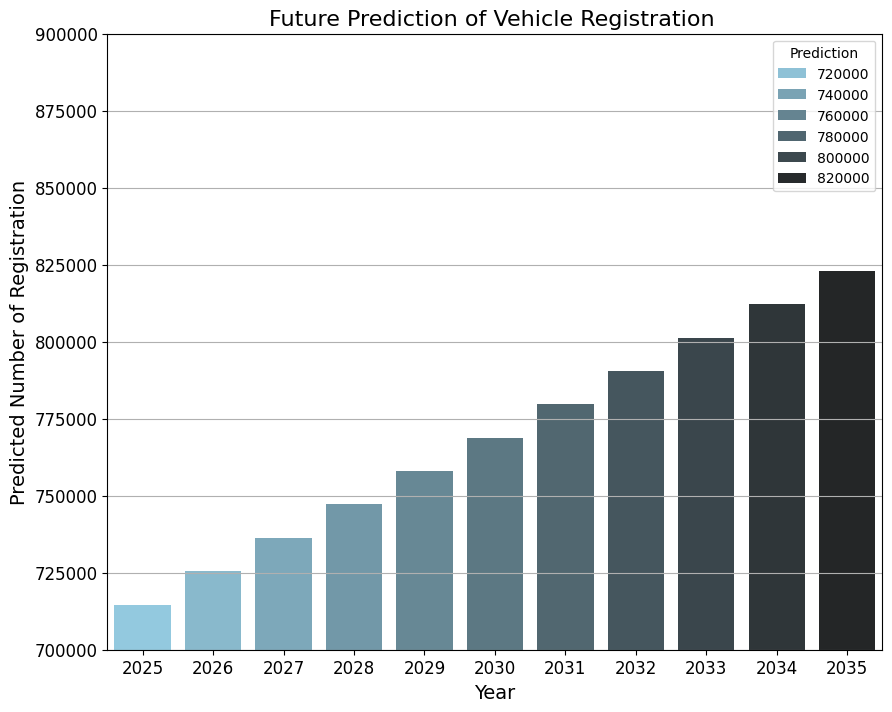

In [371]:
# Plot the predicted trends in 10 years ahead

sns.barplot(data=future_prediction, x='Year', y='Prediction',
            color='skyblue_r', hue='Prediction')
plt.title('Future Prediction of Vehicle Registration ')
plt.xlabel('Year')
plt.ylabel('Predicted Number of Registration')
plt.ylim(7*1e5,9*1e5)
plt.grid(axis='y')
plt.show()

##### Summary/Conclusion

Registration Trends :
- Ragistration increased drastically post-2021 due to COVID recovery.

Regional Preferences : 
- Urban regions have higher registrations.

Vehicle Types :
- Affordable and local brands like *Proton* and *Perodua* dominate the market.
- *Myvi*, *Saga*, *Axia*, *Vios* and *Bezza* are top 5 model that dominate. *Axia* and *Bezza* are gradually gaining popularity eventhough the model quite new in the market